# **A real estate agency project**


# **Business problem**
To develop a model for a Real Estate Agency that helps homeowners buy and sell homes. The model will help the agency give the best advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount. The model will look out for features that make the home higly priced in comparison with those that are low priced

# **Data Understanding**
The data being used is the King County House Sales dataset which has more than 21000 entries that shows the price of a house depending on the features in it. The features put in consideration include: the number of bedrooms, condition of the house,age and the square footage. The data will be cleaned to look for missing and invalid values then used for analysis and create a model with the most relevant data.

##LOADING THE DATA**

In [40]:
#import libralies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from google.colab import files #importing files to google_colab
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [42]:
#inspect the dataset
house_data = pd.read_csv('kc_house_data.csv')
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# ***Data preparation: ***
This involves inspecting the dataset to know its shape(total rows and columns) what type of datatypes the dataset has, looking for duplicates and missing values and dealing with missing data.

In [43]:
#inspecting the dataset
house_data.shape

(21597, 21)

In [44]:
#getting more information about the features of the dataset
house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [45]:
#check for missing values
house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From the information above, yr_renovated(Year when house was renovated) has the most missing values 
together with waterfront(House which has a view to a waterfront). The other features have no missing values 

**Dealing with the waterfront column which has a high number of missing values**

In [46]:
#investigate the unique values in waterfront column
house_data.waterfront.unique()[:5]

array([nan,  0.,  1.])

In [47]:
#check total number of missing values in the waterfront column
house_data['waterfront'].isna().sum()

2376

In [48]:
#finding how many values of waterfront are represented with 0(meaning, the house has no view to a water front)
waterfront_0 = house_data['waterfront']==0
waterfront_0.value_counts()

True     19075
False     2522
Name: waterfront, dtype: int64

In [49]:
#finding out how many values of the waterfront column are represented with 1(meaning, the house has a view to a water front)
waterfront_1 = house_data['waterfront']==1
waterfront_1.value_counts()

False    21451
True       146
Name: waterfront, dtype: int64

From the information above, the number of houses with a view to a waterfront are only 146, 19075 fields are represented with 0 and there are  2376 null values. Assuming the null values means that the house has no view to a waterfront, we fill them with 0. 

In [50]:
#fill the null field in waterfront column with 0
house_data["waterfront"] = house_data["waterfront"].fillna(0.0)

In [51]:
#confirm there are no missing values in the waterfront column
house_data['waterfront'].isna().sum()

0

In [52]:
#convert the datatype from float to int for waterfront column
house_data['waterfront'] =house_data['waterfront'].astype(np.int64)

**Dealing with 'yr_renovated' column which also has a higher number of missing values**

In [53]:
#check for missing values in the column
house_data['yr_renovated'].isna().sum()

3842

In [54]:
#check for unique value in yr_renovated column
house_data.yr_renovated.unique()[:5]

array([   0., 1991.,   nan, 2002., 2010.])

In [55]:
#check how many rows are filled with 0 in the 'yr_renovated' column
year_0 = house_data['yr_renovated']==0
year_0.value_counts()

True     17011
False     4586
Name: yr_renovated, dtype: int64

From the information above, the yr_renovated has a total of 3842 missing values(nan) and the number of fields in the column filled with 0 are 17011. Since we need the column to compare how renovations affect the price of the house, we assume that 0 means the house has never been renovated, hence we fill all the fields with 0s as 'Not renovated' but first fill the missing values with 0. 

In [56]:
#fill the missing values with 0
house_data["yr_renovated"] = house_data["yr_renovated"].fillna(0)

In [57]:
#replace 0 with Not renovated
house_data.loc[house_data["yr_renovated"]==0.0, "yr_renovated"]='Not Renovated'

In [58]:
#confirm there are no missing values in the waterfront column
house_data['yr_renovated'].isna().sum()

0

The number of floors also need to be a specific number. We change the datatype to integer

In [59]:
#convert floors datatype from float to integer
house_data['floors'] =house_data['floors'].astype(np.int64)
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated      object
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

The view column:

In [60]:
#check the unique values inthe view column
house_data.view.unique()[:5]

array([ 0., nan,  3.,  4.,  2.])

In [61]:
#check the value counts for each value in the view column
house_data.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [62]:
#check for missing values
house_data.view.isna().sum()

63

In [63]:
#since most values are filled with zero(0), we fill the null values with the most common
house_data["view"] = house_data["view"].fillna(0.0)

The basement column

In [64]:
#check for unique value in the basement column
house_data.sqft_basement.unique()[:5]

array(['0.0', '400.0', '910.0', '1530.0', '?'], dtype=object)

In [65]:
#fill ? value with 0
house_data.loc[house_data["sqft_basement"]=='?', "sqft_basement"]='0.0'

In [66]:
#convert the sqft_basement datatype from string to float
house_data['sqft_basement'] =house_data['sqft_basement'].astype(np.float64)
#convert sqft_basement datatype from float to integer
house_data['sqft_basement'] =house_data['sqft_basement'].astype(np.int64)

In [67]:
#inspect the changes made on the dataset
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1,0,0.0,...,7,1180,0,1955,Not Renovated,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2,0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1,0,0.0,...,6,770,0,1933,Not Renovated,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1,0,0.0,...,7,1050,910,1965,Not Renovated,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1,0,0.0,...,8,1680,0,1987,Not Renovated,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3,0,0.0,...,8,1530,0,2009,Not Renovated,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2,0,0.0,...,8,2310,0,2014,Not Renovated,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2,0,0.0,...,7,1020,0,2009,Not Renovated,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2,0,0.0,...,8,1600,0,2004,Not Renovated,98027,47.5345,-122.069,1410,1287


# **Modelling**

1. Create a heatmap to show the correlation between the features of the dataset

In [68]:
#import necessary libries for ploting
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#create a  correlation matrix between all the features of our dataset
house_data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.019229,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.237264,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.158065,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.520922,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353372,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.008603,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.019229,0.237264,0.158065,0.520922,0.353372,-0.008603,1.000000,0.018321,0.023711,-0.293463,0.473273,0.518037,-0.231754,0.578549,-0.097146,0.029218,0.159481,0.296797,-0.012766
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.018321,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.023711,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.293463,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


**Visualize the correlation matrix**

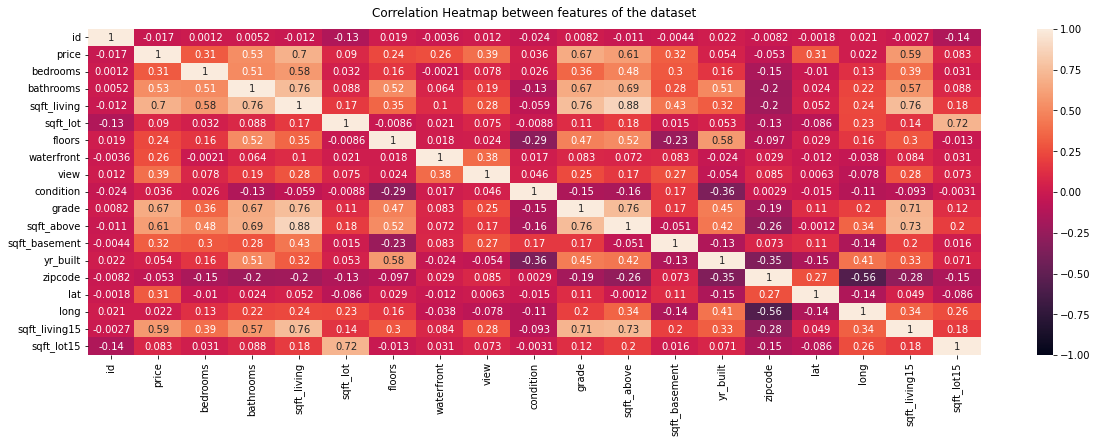

In [70]:
#plot a heatmap to show correlation
plt.figure(figsize=(20, 6))

heatmap = sns.heatmap(house_data.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap between features of the dataset', fontdict={'fontsize':12}, pad=12);

2***. Check for multicolinearity of features. ***

Check which features have a high correlation using 0.7 as the cut-off

In [71]:
#check for high among the features correlation
abs(house_data.corr()) > 0.7

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Visualize the multicolinearity check

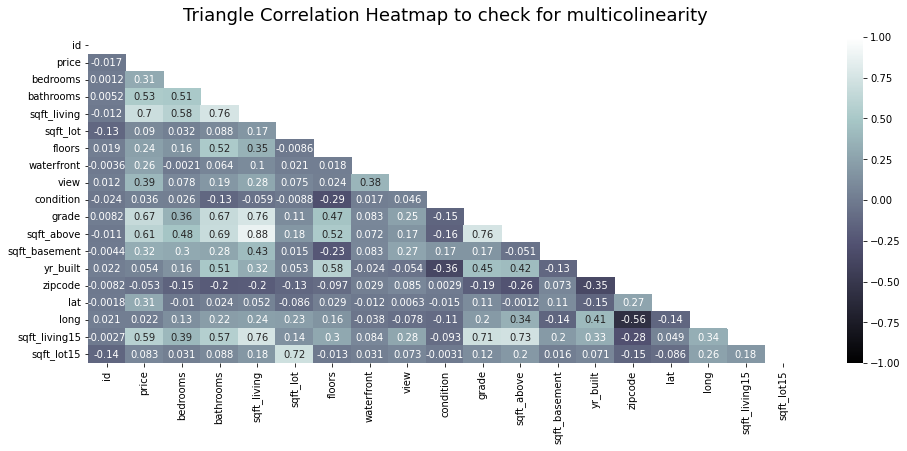

In [72]:
#plot a triangle heatmap to visually inspect multicolinearity
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(house_data.corr(), dtype=np.bool_))
heatmap = sns.heatmap(house_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='bone')
heatmap.set_title('Triangle Correlation Heatmap to check for multicolinearity', fontdict={'fontsize':18}, pad=16);

There is multicolinearity between sqft_living, grade, sqft_living15, sqft_lot15 and sqft_above.

**Because we want to compare the price to other features, we plot a Colored map that shows correlation of independent Variables(all other features) with the Dependent Variable(Price) that shows the strength of the correlation.**

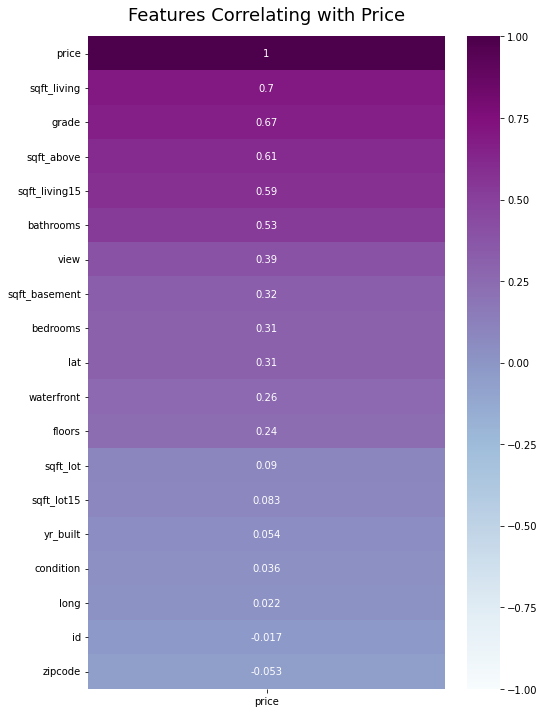

In [73]:
#plot a colored  map to show correlation of features to the price
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(house_data.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

**Interpreting the above results:**
From the color map above, sqft_living(footage of the home) is the most correlated feature to the price of the house. This means that the bigger the footage of the house, the higher the price. The other features that highly determine the price are: grade(overall grade given to the housing unit, based on King County grading system), the square footage of interior housing living space for the nearest 15 neighbors and the square footage of house apart from basement.
The features that least affect the prices are: the overall condition of the house, the zipcode of the area where the house is built and the year the house was built.

To deal with multicollinearity, we remove some of the features that are colinear. 

In [74]:
#Drop some of the highly correlated faetures
house_data1 =house_data.drop(['grade', 'sqft_living15', 'sqft_lot15'], inplace=True, axis=1)


In [75]:
#inspect the dataframe after dropping some columns
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1,0,0.0,3,1180,0,1955,Not Renovated,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2,0,0.0,3,2170,400,1951,1991.0,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1,0,0.0,3,770,0,1933,Not Renovated,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1,0,0.0,5,1050,910,1965,Not Renovated,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1,0,0.0,3,1680,0,1987,Not Renovated,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3,0,0.0,3,1530,0,2009,Not Renovated,98103,47.6993,-122.346
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2,0,0.0,3,2310,0,2014,Not Renovated,98146,47.5107,-122.362
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2,0,0.0,3,1020,0,2009,Not Renovated,98144,47.5944,-122.299
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2,0,0.0,3,1600,0,2004,Not Renovated,98027,47.5345,-122.069


we now plot a scatter plot to show whether there is a linear relationship between sqft_living(most correlated feature) and the price

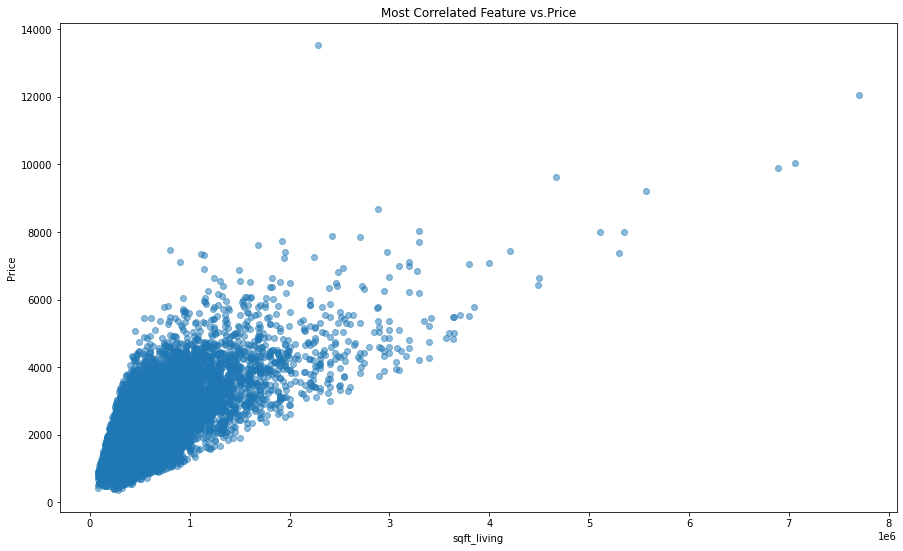

In [76]:
from scipy import stats
fig, ax = plt.subplots(figsize = (15, 9))
x = house_data['sqft_living']
y = house_data['price']
ax.scatter(house_data['price'], house_data['sqft_living'],  alpha=0.5)
ax.set_xlabel('sqft_living')
ax.set_ylabel("Price")
ax.set_title("Most Correlated Feature vs.Price");

We now draw a regression line to visually inspect the plot

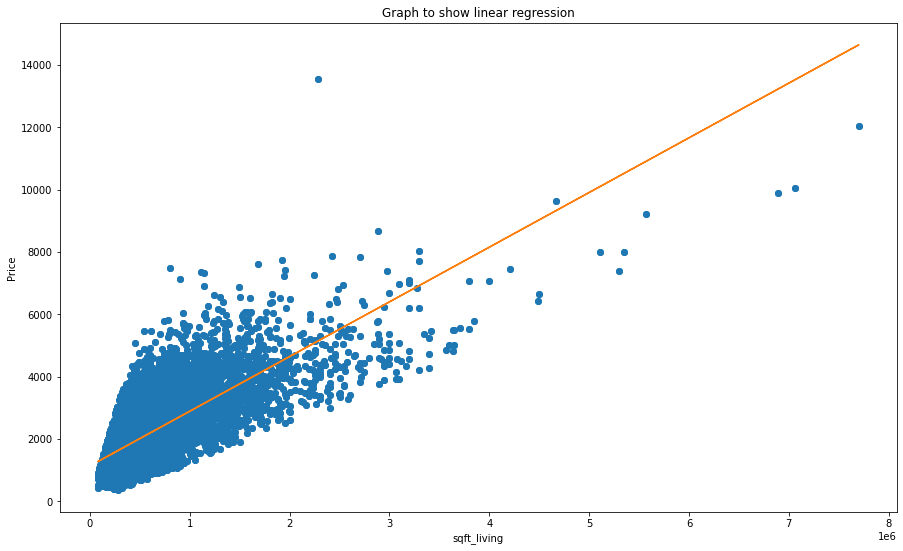

In [77]:
#plot a regression line
import numpy as np
from sklearn.linear_model import LinearRegression
fig, ax = plt.subplots(figsize = (15, 9))
x = house_data['price']
y = house_data['sqft_living']
ax.scatter(house_data['price'], house_data['sqft_living'])
ax.set_xlabel('sqft_living')
ax.set_ylabel("Price")
ax.set_title('Graph to show linear regression');
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)


The graph shows a fairly clear linear relationship between price and the sqft_living. It's likely that if the house footage is large, the price is most likely to be high. 
The graph also shows that most of the houses have a square footage between 0.1 and 2 square feet.  

We now build a model: Simple linear regression

In [78]:
from statsmodels.formula.api import ols
a = 'price~sqft_living'
model = ols(formula=a, data=house_data).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:22:28   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the regression results, R-squared(the goodness of fit) for our model is 0.493. This means that 49% of the variations in dependent variable(price) are explained by the independent variable(sqft_living) in our model. The p-value is 0.00, meaning that the probability of a sample like this yielding the same statistical results is zero. 
The distribution is not normal and our model is not statistically significant

Next, we inspect features that are correlated with sqft_living(inspect whether the number of bathrooms and bedromms affect the footage

In [79]:
#find the correlation between number of bedrooms and the square footage 
house_data['sqft_living'].corr(house_data['bedrooms'])

0.5782122492778411

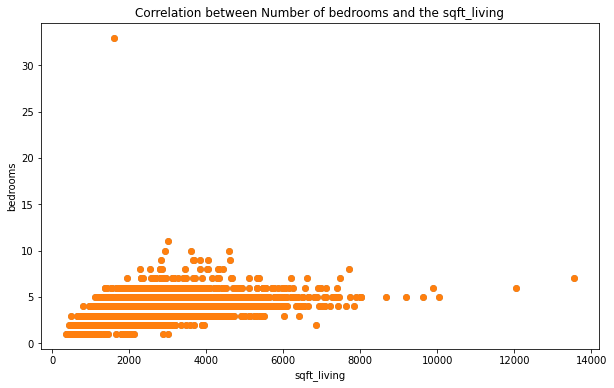

In [80]:
#plot a scatter plot to show correlation
from matplotlib import pyplot
fig, ax = plt.subplots(figsize = (10, 6))
x = house_data['sqft_living']
y = house_data['bedrooms']
ax.scatter(house_data['sqft_living'], house_data['bedrooms'],  alpha=0.5)
ax.set_xlabel('sqft_living')
ax.set_ylabel("bedrooms")
ax.set_title("Correlation between Number of bedrooms and the sqft_living")
pyplot.scatter(house_data['sqft_living'], house_data['bedrooms'] )
pyplot.show()

There is a moderate correlation between the number of bedrooms in a house and square footage. Its not likely that a high number of bedrooms would result in a high square footage.

Check whether the number of bathrooms could have an effect on the square footage of the house

In [81]:
#find correlation between sqft_living and bathrooms
house_data['sqft_living'].corr(house_data['bathrooms'])

0.7557576009502518

Visualise correlation between sqft_living and the number of bathrooms

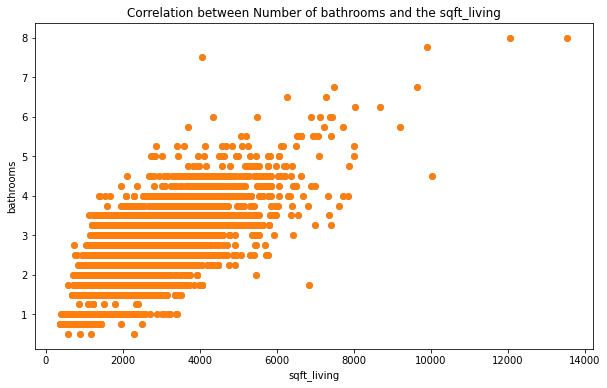

In [82]:
#plot a scatter plot to show correlation
from matplotlib import pyplot
fig, ax = plt.subplots(figsize = (10, 6))
x = house_data['sqft_living']
y = house_data['bathrooms']
ax.scatter(house_data['sqft_living'], house_data['bathrooms'],  alpha=0.5)
ax.set_xlabel('sqft_living')
ax.set_ylabel("bathrooms")
ax.set_title("Correlation between Number of bathrooms and the sqft_living")
pyplot.scatter(house_data['sqft_living'], house_data['bathrooms'] )
pyplot.show()

From the scatter plot above, there is a positive relationship between the number of bedrooms and the square footage of the house. High number of bedrooms would most likely result in high square footage. 

Check  whether there is correlation between sqft_basement and price

In [84]:
#find the correlation between price and the sqft_basement
house_data['price'].corr(house_data['sqft_basement'])

0.3211075697595653

*There is a weak correlation between sqft_basement and price.*

From the analysis above, the best combination of features that are likely to influence the price of the house are the sqft_living which is most likely influenced by the number of bathrooms and the number of bedrooms. The sqft_basement feature is also least likely to have effects on the price

Multiple linear regression to compare different predictors

In [97]:
columns =['sqft_living', 'bedrooms', 'bathrooms', 'view', 'yr_built' ]
predictors = '+'.join(columns)
formula = 'price' + '~' + predictors
model = ols(formula=formula, data=house_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     5870.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:57:12   Log-Likelihood:            -2.9812e+05
No. Observations:               21597   AIC:                         5.963e+05
Df Residuals:                   21591   BIC:                         5.963e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.253e+06   1.28e+05     40.969      0.000       5e+06     5.5e+06
sqft_living   275.5834      2.964     92.975      0.000     269.774     281.393
bedrooms    -6.028e+04   2206.829    -27.313      0.000   -6.46e+04    -5.6e+04
bathrooms    7.658e+04   3642.308     21.024      0.000    6.94e+04    8.37e+04
view         8.164e+04   2264.768     36.049      0.000    7.72e+04    8.61e+04
yr_built    -2670.6299     66.071    -40.421      0.000   -2800.134   -2541.126
==============================================================================
Omnibus:                    13701.749   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           515555.552
Skew:                           2.498   Prob(JB):                         0.00
Kurtosis:                      26.409   Cond. No.                     2.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Interpreting the model*:
1. the intercept for the model is 5.25 (the mean when all predictor values are zero) 
2. For each additional square footage, the price of the house goes up by 275.
3. The prices go down by 2670 for houses built one year down

**Investigate Normality**

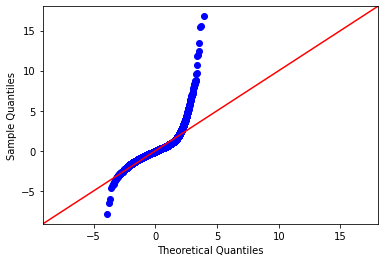

In [100]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# **Conclusion**

---



The square footage of a house is the main determinant feature of its price. 

The square footage also determines the number of bedrooms and bathrooms in a house. It also determines the grade which also determine the price.

The zipcode(location of the house) is the feature that least determines the price